ACTIVIDAD 1:
Cargue una imagen distinta a la trabajada en clase y aplique todas las operaciones básicas de modificación de la imagen usando una de las librerías vistas en clase (PIL u OpenCV)

Dimensiones: 626px de ancho x 364px de alto
Canales de color: 3


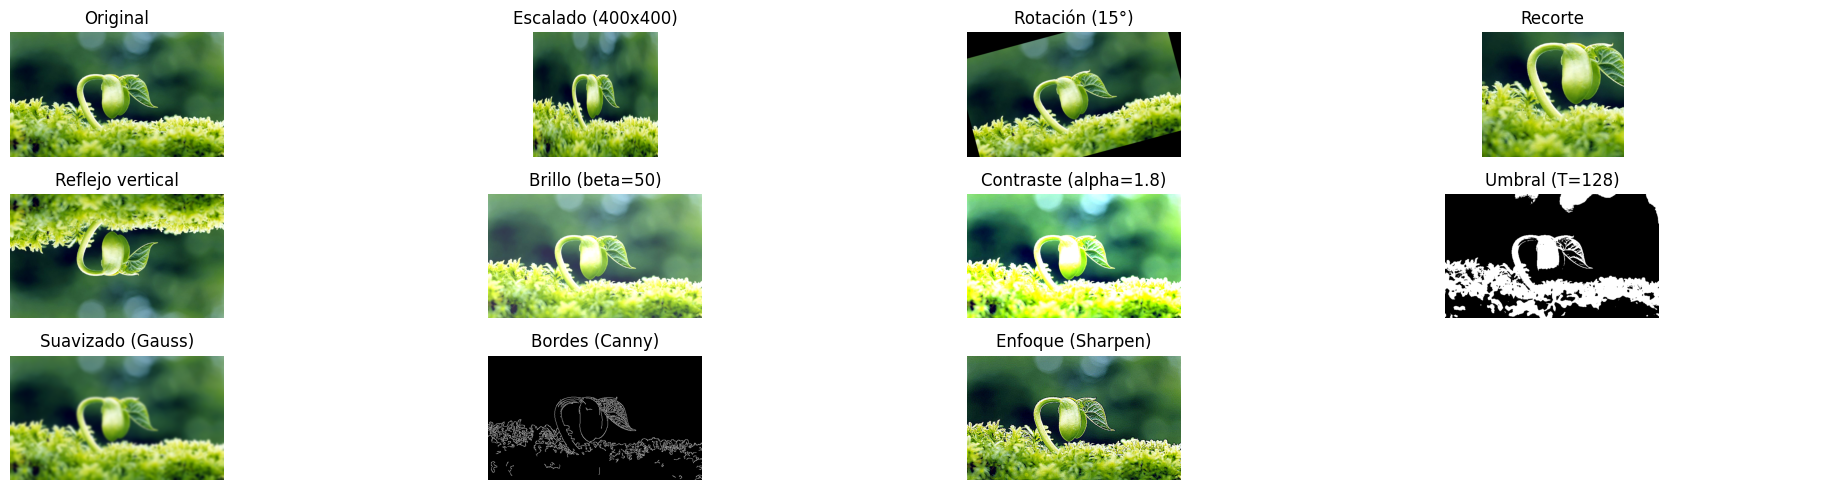

In [5]:

#liberria para leer una imagen Opencv
import cv2
import numpy as np
#liberria para abrir url's 
import urllib.request
#liberia en caso de la falta de la configuracion certificados SSL en Python
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
import matplotlib.pyplot as plt

url = "https://github.com/robinchiluisa-ops/Tarea-practica-G3-/blob/main/germinacion.jpg?raw=true"

# Descargamos la imagen
resp = urllib.request.urlopen(url)
# Lee la image en forma de bytes, se trasnforma a una array numpy
image_np = np.asarray(bytearray(resp.read()), dtype=np.uint8)
img1= cv2.imdecode(image_np, cv2.IMREAD_COLOR)
img=cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
if image_np is None:
    print(f"Error: No se encontró la imagen en {url}")
else:
    # Obtener información (alto, ancho, canales)
    alto, ancho, canales = img.shape
    print(f"Dimensiones: {ancho}px de ancho x {alto}px de alto")
    print(f"Canales de color: {canales}")

    # A. ESCALADO (Resizing)
    # OpenCV usa (ancho, alto)
    img_resizada = cv2.resize(img, (400, 400))

    # B. ROTACIÓN
    # 1. Obtener matriz de rotación: centro, ángulo, escala
    centro = (ancho // 2, alto // 2)
    matriz = cv2.getRotationMatrix2D(centro, 15, 1.0)
    # 2. Aplicar la transformación
    img_rotada = cv2.warpAffine(img, matriz, (ancho, alto))

    # C. RECORTE (Cropping)
    # Slicing de matriz: img[y_inicio:y_fin, x_inicio:x_fin]
    img_recortada = img[100:400, 100:400]

    # D. REFLEJO (Flip)
    # 1 para horizontal, 0 para vertical, -1 para ambos
    img_reflejada = cv2.flip(img, 0)

    
    # --- OPERACIONES DE PUNTO ---

    # A. Ajuste de Brillo
    # cv2.convertScaleAbs(img, alpha, beta) -> alpha es contraste, beta es brillo
    # Para solo brillo, dejamos alpha=1 y sumamos beta=50
    img_brillo = cv2.convertScaleAbs(img, alpha=1.0, beta=50)

    # B. Ajuste de Contraste
    # Multiplicamos por alpha (ej. 1.8 para aumentar 80%)
    img_contraste = cv2.convertScaleAbs(img, alpha=1.8, beta=0)

    # C. Umbralización (Thresholding)
    # 1. Convertir a gris
    img_gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # 2. Aplicar umbral: cv2.threshold(imagen, valor_umbral, valor_max, tipo)
    _, img_umbral = cv2.threshold(img_gris, 128, 255, cv2.THRESH_BINARY)

# --- OPERACIONES DE VECINDAD (FILTROS) ---

    # A. Suavizado (Gaussian Blur)
    # (15, 15) es el tamaño del kernel (debe ser impar). A mayor número, más borroso.
    img_gauss = cv2.GaussianBlur(img, (15, 15), 0)

    # B. Detección de Bordes (Canny)
    # Canny es más avanzado que FIND_EDGES. 100 y 200 son los umbrales de detección.
    # Convertimos primero a gris para una mejor detección de bordes
    img_gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_bordes = cv2.Canny(img_gris, 100, 200)

    # C. Enfoque (Sharpening)
    # OpenCV no tiene un "Sharpen" directo, se usa un kernel personalizado
    kernel_sharpen = np.array([[-1, -1, -1], 
                               [-1,  9, -1], 
                               [-1, -1, -1]])
    img_enfoque = cv2.filter2D(img, -1, kernel_sharpen)


    # --- VISUALIZACIÓN ---
    fig, axs = plt.subplots(3, 4, figsize=(20, 5))
    axs = axs.ravel()

    axs[0].imshow(img); axs[0].set_title("Original")
    axs[1].imshow(img_resizada); axs[1].set_title("Escalado (400x400)")
    axs[2].imshow(img_rotada); axs[2].set_title("Rotación (15°)")
    axs[3].imshow(img_recortada); axs[3].set_title("Recorte")
    axs[4].imshow(img_reflejada); axs[4].set_title("Reflejo vertical")
    axs[5].imshow(img_brillo); axs[5].set_title("Brillo (beta=50)")
    axs[6].imshow(img_contraste);axs[6].set_title("Contraste (alpha=1.8)")
    axs[7].imshow(img_umbral, cmap='gray'); axs[7].set_title("Umbral (T=128)")
    
    axs[8].imshow(img_gauss); axs[8].set_title("Suavizado (Gauss)")

    # Usamos cmap='gray' porque Canny devuelve una imagen de un solo canal
    axs[9].imshow(img_bordes, cmap='gray'); axs[9].set_title("Bordes (Canny)")
    axs[10].imshow(img_enfoque); axs[10].set_title("Enfoque (Sharpen)")
    
    for ax in axs: ax.axis('off')
    plt.tight_layout()
    plt.show()
  

Tome una foto con la cámara de su computador, imprima sus características como tamaño y forma, luego recórtela para que solo se pueda observar los ojos de una persona.

Cámara abierta. Presiona 's' para tomar una foto o 'q' para salir.
Características de la imagen:
Alto: 480 píxeles
Ancho: 640 píxeles
Forma (shape): (480, 640)


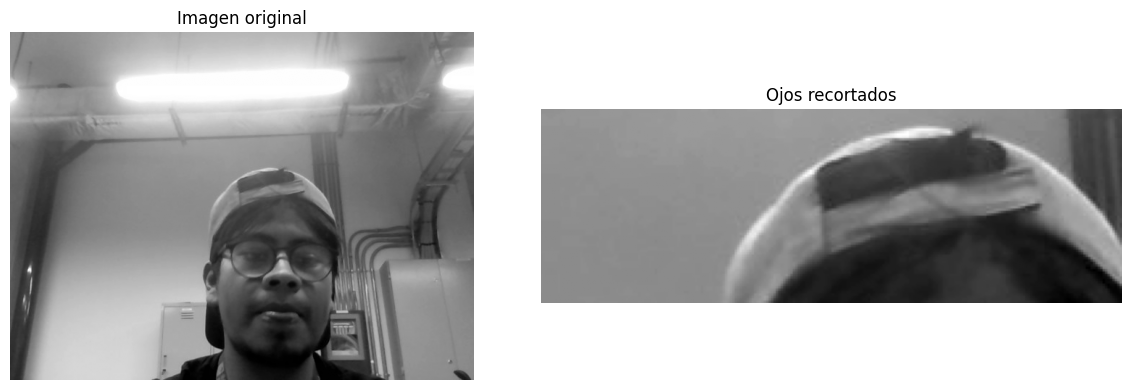

In [2]:
import cv2
import matplotlib.pyplot as plt

# 1. Inicializar la cámara (0 es la cámara por defecto)
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: No se pudo acceder a la cámara.")

else:
    print("Cámara abierta. Presiona 's' para tomar una foto o 'q' para salir.")

    while True:
        # 2. Leer un frame de la cámara
        ret, frame = cap.read()
        if not ret:
            print("Error al capturar el video.")
            break
        # 3. Mostrar el video en vivo en una ventana
        cv2.imshow('Presiona S para tomar foto', frame)
        # 4. Escuchar el teclado
        key = cv2.waitKey(1) & 0xFF
        # 5. Leer la imagen
        if key == ord('s'):
            img_color = frame.copy()   # imagen original
            img = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)  # escala de grises
            break

        elif key == ord('q'):# Si presiona 'q', sale sin guardar
            break
# 6. Liberar la cámara y cerrar ventanas
cap.release()
cv2.destroyAllWindows()

# 7. Cracteristicas y forma de la imagen
alto, ancho = img.shape
print("Características de la imagen:")
print(f"Alto: {alto} píxeles")
print(f"Ancho: {ancho} píxeles")
print(f"Forma (shape): {img.shape}")

#RECORTE (Cropping)
# Slicing de matriz: img[y_inicio:y_fin, x_inicio:x_fin]
img_recortada = img[180:260, 200:440]

 # --- VISUALIZACIÓN ---
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].imshow(img, cmap='gray'); axs[0].set_title("Imagen original")
axs[1].imshow(img_recortada, cmap='gray');axs[1].set_title("Ojos recortados")

for ax in axs:
    ax.axis('off')

plt.tight_layout()
plt.show()

A la misma imagen tomada con la cámara, rotéla 180 grados, realice el reflejo de ella y mejore su enfoque si es posible.

Cámara abierta. Presiona 's' para tomar una foto o 'q' para salir.
Características de la imagen:
Alto: 480 píxeles
Ancho: 640 píxeles
Forma (shape): (480, 640)


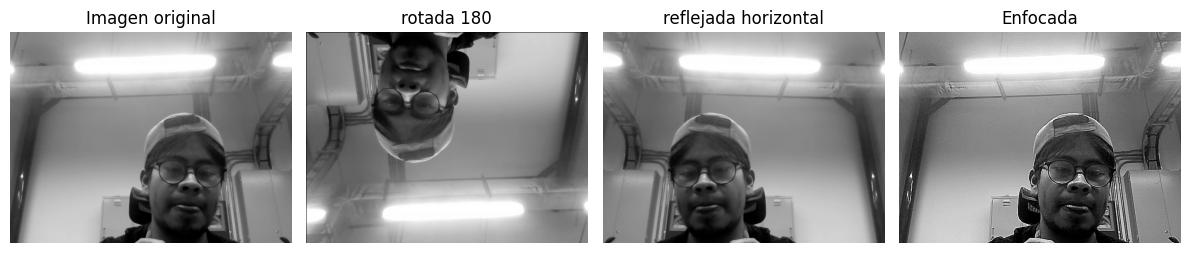

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# 1. Inicializar la cámara (0 es la cámara por defecto)
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: No se pudo acceder a la cámara.")

else:
    print("Cámara abierta. Presiona 's' para tomar una foto o 'q' para salir.")

    while True:
        # 2. Leer un frame de la cámara
        ret, frame = cap.read()
        if not ret:
            print("Error al capturar el video.")
            break
        # 3. Mostrar el video en vivo en una ventana
        cv2.imshow('Presiona S para tomar foto', frame)
        # 4. Escuchar el teclado
        key = cv2.waitKey(1) & 0xFF
        # 5. Leer la imagen
        if key == ord('s'):
            img_color = frame.copy()   # imagen original
            img = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)  # escala de grises
            break

        elif key == ord('q'):# Si presiona 'q', sale sin guardar
            break
# 6. Liberar la cámara y cerrar ventanas
cap.release()
cv2.destroyAllWindows()

# 7. Cracteristicas y forma de la imagen
alto, ancho = img.shape
print("Características de la imagen:")
print(f"Alto: {alto} píxeles")
print(f"Ancho: {ancho} píxeles")
print(f"Forma (shape): {img.shape}")

 # A. ROTACIÓN
    # 1. Obtener matriz de rotación: centro, ángulo, escala
centro = (ancho // 2, alto // 2)
matriz = cv2.getRotationMatrix2D(centro, 180, 1.0)
# 2. Aplicar la transformación
img_rotada = cv2.warpAffine(img, matriz, (ancho, alto))

 # B. REFLEJO (Flip)
# 1 para horizontal, 0 para vertical, -1 para ambos
img_reflejada = cv2.flip(img, 1)

# C. Enfoque (Sharpening)
    # OpenCV no tiene un "Sharpen" directo, se usa un kernel personalizado
kernel_sharpen = np.array([[-1, -1, -1], 
                               [-1,  9, -1], 
                               [-1, -1, -1]])

img_enfocada = cv2.filter2D(img, -1, kernel_sharpen)

 # --- VISUALIZACIÓN ---
fig, axs = plt.subplots(1, 4, figsize=(12, 4))
axs[0].imshow(img, cmap='gray'); axs[0].set_title("Imagen original")
axs[1].imshow(img_rotada, cmap='gray');axs[1].set_title("rotada 180")
axs[2].imshow(img_reflejada, cmap='gray');axs[2].set_title("reflejada horizontal")
axs[3].imshow(img_enfocada, cmap='gray'); axs[3].set_title("Enfocada")
for ax in axs:
    ax.axis('off')

plt.tight_layout()
plt.show()

Toma una foto con la cámara del computador a una persona con lentes y aplique la detección de bordes con el fin de detectar solo los lentes de la persona y su silueta sin usar componentes adicionales que los vistos en clases.

Cámara abierta. Presiona 's' para tomar una foto o 'q' para salir.


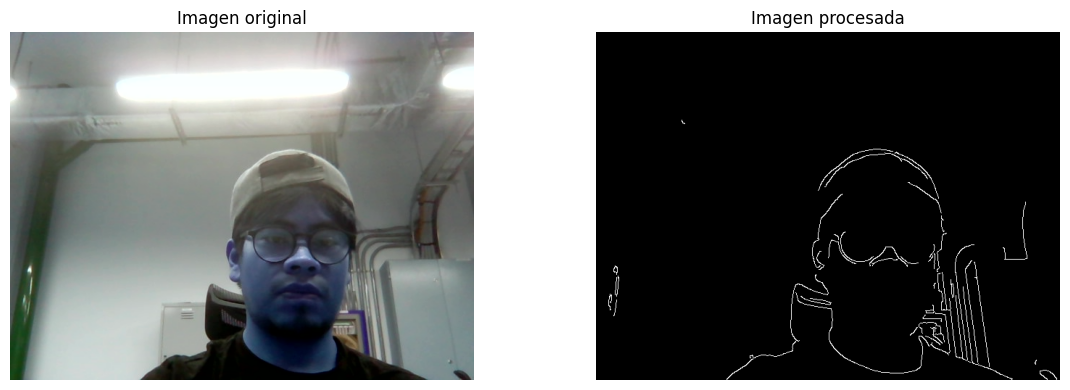

In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# 1. Inicializar la cámara (0 es la cámara por defecto)
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: No se pudo acceder a la cámara.")

else:
    print("Cámara abierta. Presiona 's' para tomar una foto o 'q' para salir.")

    while True:
        # 2. Leer un frame de la cámara
        ret, frame = cap.read()
        if not ret:
            print("Error al capturar el video.")
            break
        # 3. Mostrar el video en vivo en una ventana
        cv2.imshow('Presiona S para tomar foto', frame)
        # 4. Escuchar el teclado
        key = cv2.waitKey(1) & 0xFF
        # 5. Leer la imagen
        if key == ord('s'):
            img_color = frame.copy()   # imagen original
            break

        elif key == ord('q'):# Si presiona 'q', sale sin guardar
            break
# 6. Liberar la cámara y cerrar ventanas
cap.release()
cv2.destroyAllWindows()
#RECORTE (Cropping)
# Slicing de matriz: img[y_inicio:y_fin, x_inicio:x_fin]
img_color = img_color[180:260, 200:440]
# 1. Convertir a gris
# 1. Convertir a gris
img_gris = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)

# 2. Suavizado (Gaussian Blur)
    # (15, 15) es el tamaño del kernel (debe ser impar). A mayor número, más borroso.
img_gauss = cv2.GaussianBlur(img_gris, (5, 5), 0)

 # 3. Detección de Bordes (Canny)
img_canny = cv2.Canny(img_gauss, 80, 160)

 # --- VISUALIZACIÓN ---
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].imshow(img_color, cmap='gray'); axs[0].set_title("Imagen original")
axs[1].imshow(img_canny, cmap='gray');axs[1].set_title("Imagen procesada")

for ax in axs:
    ax.axis('off')

plt.tight_layout()
plt.show()